In [1]:
import pandas as pd 
import re
from sklearn.impute import SimpleImputer
df = pd.read_csv(r"c:\Users\haith\Downloads\movies.csv")
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [2]:
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

#df['YEAR'].value_counts()
#df['YEAR'].str.extract(r'(\d{4})').astype(float).value_counts()


False    9568
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      9026 non-null   object 
 2   GENRE     9490 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   7008 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 747.5+ KB


In [4]:
def extract_year(x):
    if isinstance(x, str):
        match = re.search(r'\b(19|20)\d{2}\b', x)
        if match:
            return int(match.group())
    return None
df['YEAR'] = df['YEAR'].map(extract_year)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021.0,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021.0,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,2010.0,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013.0,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021.0,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022.0,"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021.0,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,2022.0,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,2021.0,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [5]:
df['GENRE']=df['GENRE'].str.replace(r'\n','',regex=True).str.strip()
df['ONE-LINE']=df['ONE-LINE'].str.replace(r'\n','',regex=True).str.strip()
df['VOTES']=df['VOTES'].str.replace(',','',regex=True).astype(float)
df['STARS']=df['STARS'].str.replace(r'\n','',regex=True).str.strip()
imputer = SimpleImputer(strategy='most_frequent')
df[['GENRE']] = imputer.fit_transform(df[['GENRE']])


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      8933 non-null   float64
 2   GENRE     9568 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   float64
 7   RunTime   7008 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(4), object(5)
memory usage: 747.5+ KB


In [6]:
df.isna().sum()
df[df[['RunTime','RATING','VOTES']].isna().all(axis=1)]
df.drop(df[df[['RunTime','RATING','VOTES']].isna().all(axis=1)].index, inplace=True)

In [7]:
df.isna().sum()
df.drop(df[df[['VOTES','RATING']].isna().all(axis=1)].index, inplace=True)
df.drop(columns=['Gross'],inplace=True)

In [8]:
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8168 entries, 0 to 9979
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8168 non-null   object 
 1   YEAR      8168 non-null   float64
 2   GENRE     8168 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  8168 non-null   object 
 5   STARS     8168 non-null   object 
 6   VOTES     8168 non-null   float64
 7   RunTime   6786 non-null   float64
dtypes: float64(4), object(4)
memory usage: 574.3+ KB


In [9]:
df[['RATING','VOTES','RunTime']].describe().round(2)

,RATING,VOTES,RunTime
count,8168.00,8168.00,6786.00
mean,6.92,15144.41,69.46
std,1.22,70099.54,47.48
min,1.10,5.00,1.00
25%,6.20,167.00,37.00
50%,7.10,792.50,60.00
75%,7.80,3780.75,95.00
max,9.90,1713028.00,853.00


In [10]:
Q1=df['VOTES'].quantile(0.25)
Q3=df['VOTES'].quantile(0.75)
IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['VOTES'] < lower_bound) | (df['VOTES'] > upper_bound)]
outliers

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021.0,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062.0,121.0
1,Masters of the Universe: Revelation,2021.0,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0
2,The Walking Dead,2010.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0
3,Rick and Morty,2013.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849.0,23.0
5,Outer Banks,2020.0,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...",25858.0,50.0
...,...,...,...,...,...,...,...,...
8765,Dark,2017.0,"Crime, Drama, Mystery",9.3,Adam holds Martha captive in 2020. On the day ...,"Director:Baran bo Odar| Stars:Lisa Vicari,...",11525.0,59.0
8766,Dark,2017.0,"Crime, Drama, Mystery",9.6,"Across three centuries, residents of Winden co...",Director:Baran bo Odar| Stars:Arnd Klawitt...,15128.0,69.0
8767,Dark,2017.0,"Crime, Drama, Mystery",9.7,Claudia reveals to Adam how everything is conn...,Director:Baran bo Odar| Stars:Sebastian Ru...,20230.0,73.0
8959,The Queen's Gambit,2020.0,Drama,9.3,A visit from an old friend forces Beth to reck...,Director:Scott Frank| Stars:Anya Taylor-Jo...,10355.0,68.0


In [11]:
imputer = SimpleImputer(strategy='mean')
df['RunTime'] = imputer.fit_transform(df[['RunTime']])
df.isna().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64

In [12]:
df['RunTime']

0       121.00000
1        25.00000
2        44.00000
3        23.00000
5        50.00000
          ...    
9960     37.00000
9961     40.00000
9962     47.00000
9963     24.00000
9979     69.45697
Name: RunTime, Length: 8168, dtype: float64

In [13]:
df.to_csv(r"c:\Users\haith\Downloads\movies_cleaned.csv", index=False)

In [14]:
df.describe()

,YEAR,RATING,VOTES,RunTime
count,8168.000000,8168.000000,8.168000e+03,8168.000000
mean,2015.832762,6.919699,1.514441e+04,69.456970
std,7.569987,1.219970,7.009954e+04,43.279518
min,1932.000000,1.100000,5.000000e+00,1.000000
25%,2015.000000,6.200000,1.670000e+02,42.000000
50%,2018.000000,7.100000,7.925000e+02,69.456970
75%,2020.000000,7.800000,3.780750e+03,90.000000
max,2021.000000,9.900000,1.713028e+06,853.000000


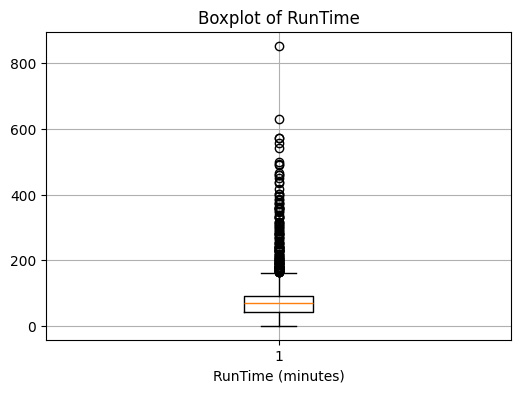

In [15]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 4))
plt.boxplot(df['RunTime'].dropna())
plt.title('Boxplot of RunTime')
plt.xlabel('RunTime (minutes)')
plt.grid(True)
plt.show()

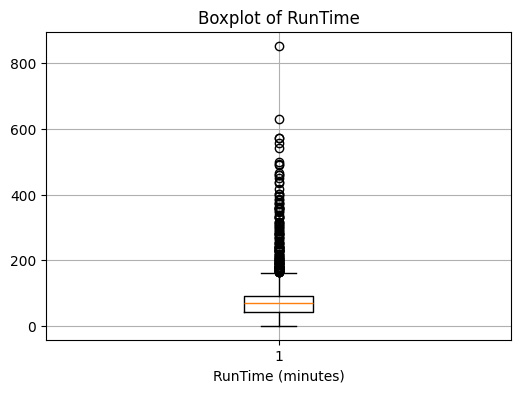

In [16]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['RunTime'])
plt.title('Boxplot of RunTime')
plt.xlabel('RunTime (minutes)')
plt.grid(True)
plt.show()

In [17]:
df.columns.str.upper()

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RUNTIME'],
      dtype='object')

In [18]:
len(df)

8168